In [7]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
# from imblearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import shap

import warnings
warnings.filterwarnings('ignore')

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [5]:
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(5, closed='left', min_periods=2).mean()
    group[new_cols] = rolling_stats
    group = group.drop(cols, axis=1)
    group = group.dropna(subset=new_cols)

    return group

# Dados jogo inteiro

In [10]:
#Networks

#ler csv

# -away
ager = pd.read_csv("analitics/network_Germany_away.csv")
aita = pd.read_csv("analitics/network_Italy_away.csv")
aeng = pd.read_csv("analitics/network_England_away.csv")
afra = pd.read_csv("analitics/network_France_away.csv")
aspa = pd.read_csv("analitics/network_Spain_away.csv")
aeur = pd.read_csv("analitics/network_European_Championship_away.csv")
acup = pd.read_csv("analitics/network_World_Cup_away.csv")

# -home
hger  = pd.read_csv("analitics/network_Germany_home.csv")
hita  = pd.read_csv("analitics/network_Italy_home.csv")
heng  = pd.read_csv("analitics/network_England_home.csv")
hfra  = pd.read_csv("analitics/network_France_home.csv")
hspa  = pd.read_csv("analitics/network_Spain_home.csv")
heur  = pd.read_csv("analitics/network_European_Championship_home.csv")
hcup  = pd.read_csv("analitics/network_World_Cup_home.csv")



In [5]:
ager.shape[0]+aita.shape[0]+aeng.shape[0]+afra.shape[0]+aspa.shape[0]+aeur.shape[0]+acup.shape[0]

1470

In [7]:
#cria média dos jogos do time em casa

cols = ['avg_closeness_centrality_T1', 'std_closeness_centrality_T1', 'min_closeness_centrality_T1', 'max_closeness_centrality_T1', 'avg_degree_centrality_T1',
        'std_degree_centrality_T1', 'min_degree_centrality_T1', 'max_degree_centrality_T1', 'avg_betweenness_centrality_T1', 'std_betweenness_centrality_T1', 
        'min_betweenness_centrality_T1', 'max_betweenness_centrality_T1', 'avg_eigenvector_centrality_T1', 'std_eigenvector_centrality_T1', 'min_eigenvector_centrality_T1',
        'max_eigenvector_centrality_T1', 'avg_clustering_T1', 'std_clustering_T1', 'min_clustering_T1', 'max_clustering_T1', 'avg_shortest_path_T1', 'mean_centroid_y_T1', 
        'std_centroid_y_T1', 'mean_centroid_x_T1', 'std_centroid_x_T1']
new_cols = [f"avg_{c}" for c in cols]

heng = heng.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heng = heng.droplevel('team1_ID')
hger = hger.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hger = hger.droplevel('team1_ID')
hita = hita.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hita = hita.droplevel('team1_ID')
hfra = hfra.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hfra = hfra.droplevel('team1_ID')
hspa = hspa.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hspa = hspa.droplevel('team1_ID')
heur = heur.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heur = heur.droplevel('team1_ID')
hcup = hcup.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hcup = hcup.droplevel('team1_ID')

In [8]:
#cria média dos jogos do time fora de casa

cols = ['avg_closeness_centrality_T2', 'std_closeness_centrality_T2', 'min_closeness_centrality_T2', 'max_closeness_centrality_T2', 'avg_degree_centrality_T2',
        'std_degree_centrality_T2', 'min_degree_centrality_T2', 'max_degree_centrality_T2', 'avg_betweenness_centrality_T2', 'std_betweenness_centrality_T2', 
        'min_betweenness_centrality_T2', 'max_betweenness_centrality_T2', 'avg_eigenvector_centrality_T2', 'std_eigenvector_centrality_T2', 'min_eigenvector_centrality_T2',
        'max_eigenvector_centrality_T2', 'avg_clustering_T2', 'std_clustering_T2', 'min_clustering_T2', 'max_clustering_T2','avg_shortest_path_T2', 'mean_centroid_y_T2', 
        'std_centroid_y_T2', 'mean_centroid_x_T2', 'std_centroid_x_T2']
new_cols = [f"avg_{c}" for c in cols]

aeng = aeng.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeng = aeng.droplevel('team2_ID')
ager = ager.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
ager = ager.droplevel('team2_ID')
aita = aita.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aita = aita.droplevel('team2_ID')
afra = afra.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
afra = afra.droplevel('team2_ID')
aspa = aspa.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aspa = aspa.droplevel('team2_ID')
aeur = aeur.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeur = aeur.droplevel('team2_ID')
acup = acup.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
acup = acup.droplevel('team2_ID')

In [9]:
#junta df home com df away
avg_ger = hger.merge(ager, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_ita = hita.merge(aita, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eng = heng.merge(aeng, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_fra = hfra.merge(afra, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_spa = hspa.merge(aspa, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eur = heur.merge(aeur, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_cup = hcup.merge(acup, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])


In [73]:
# #salva em csv
# avg_ger.to_csv('rolling_avg/net_avg_ger.csv', encoding='utf-8', index=False)
# avg_ita.to_csv('rolling_avg/net_avg_ita.csv', encoding='utf-8', index=False)
# avg_eng.to_csv('rolling_avg/net_avg_eng.csv', encoding='utf-8', index=False)
# avg_fra.to_csv('rolling_avg/net_avg_fra.csv', encoding='utf-8', index=False)
# avg_spa.to_csv('rolling_avg/net_avg_spa.csv', encoding='utf-8', index=False)
# avg_eur.to_csv('rolling_avg/net_avg_eur.csv', encoding='utf-8', index=False)
# avg_cup.to_csv('rolling_avg/net_avg_cup.csv', encoding='utf-8', index=False)

In [10]:
avg_df = pd.concat([avg_ger, avg_ita, avg_eng, avg_fra, avg_spa, avg_eur, avg_cup], ignore_index=True)

In [11]:
avg_df.to_csv('rolling_avg/net_avg_df.csv', encoding='utf-8', index=False)

In [48]:
avg_df.groupby('tournament').count()

,matchID,team1_ID,team2_ID,date,winner,avg_avg_closeness_centrality_T1,avg_std_closeness_centrality_T1,avg_min_closeness_centrality_T1,avg_max_closeness_centrality_T1,avg_avg_degree_centrality_T1,avg_std_degree_centrality_T1,avg_min_degree_centrality_T1,avg_max_degree_centrality_T1,avg_avg_betweenness_centrality_T1,avg_std_betweenness_centrality_T1,avg_min_betweenness_centrality_T1,avg_max_betweenness_centrality_T1,avg_avg_eigenvector_centrality_T1,avg_std_eigenvector_centrality_T1,avg_min_eigenvector_centrality_T1,avg_max_eigenvector_centrality_T1,avg_avg_clustering_T1,avg_std_clustering_T1,avg_min_clustering_T1,avg_max_clustering_T1,avg_avg_shortest_path_T1,avg_mean_centroid_y_T1,avg_std_centroid_y_T1,avg_mean_centroid_x_T1,avg_std_centroid_x_T1,avg_avg_closeness_centrality_T2,avg_std_closeness_centrality_T2,avg_min_closeness_centrality_T2,avg_max_closeness_centrality_T2,avg_avg_degree_centrality_T2,avg_std_degree_centrality_T2,avg_min_degree_centrality_T2,avg_max_degree_centrality_T2,avg_avg_betweenness_centrality_T2,avg_std_betweenness_centrality_T2,avg_min_betweenness_centrality_T2,avg_max_betweenness_centrality_T2,avg_avg_eigenvector_centrality_T2,avg_std_eigenvector_centrality_T2,avg_min_eigenvector_centrality_T2,avg_max_eigenvector_centrality_T2,avg_avg_clustering_T2,avg_std_clustering_T2,avg_min_clustering_T2,avg_max_clustering_T2,avg_avg_shortest_path_T2,avg_mean_centroid_y_T2,avg_std_centroid_y_T2,avg_mean_centroid_x_T2,avg_std_centroid_x_T2
tournament,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
England,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
European_Championship,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
France,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
Germany,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
Italy,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250
Spain,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245
World_Cup,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [75]:
# Jogo inteiro

#Separando dados e target
X = avg_df.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = avg_df['winner'] 
col_names = X.columns
idx = avg_df['matchID']
#Separando treino e teste
Xtrain, Xtest, y_train, y_test = train_test_split(X,
                                                y.values,
                                                stratify= y.values,
                                                test_size=0.3,
                                                random_state=42)
#Normalizando os dados
scaler = StandardScaler().fit(Xtrain)
train_sc = scaler.transform(Xtrain)
test_sc = scaler.transform(Xtest)
X_train = pd.DataFrame(train_sc, columns=col_names)
X_test = pd.DataFrame(test_sc, columns=col_names)


# Dados jogo por tempo

In [11]:
#Networks

#ler csv

# -away - 1H
ager_1h = pd.read_csv("analitics/network_Germany_away_1h.csv")
aita_1h = pd.read_csv("analitics/network_Italy_away_1h.csv")
aeng_1h = pd.read_csv("analitics/network_England_away_1h.csv")
afra_1h = pd.read_csv("analitics/network_France_away_1h.csv")
aspa_1h = pd.read_csv("analitics/network_Spain_away_1h.csv")
aeur_1h = pd.read_csv("analitics/network_European_Championship_away_1h.csv")
acup_1h = pd.read_csv("analitics/network_World_Cup_away_1h.csv")

# -away - 2H
ager_2h = pd.read_csv("analitics/network_Germany_away_2h.csv")
aita_2h = pd.read_csv("analitics/network_Italy_away_2h.csv")
aeng_2h = pd.read_csv("analitics/network_England_away_2h.csv")
afra_2h = pd.read_csv("analitics/network_France_away_2h.csv")
aspa_2h = pd.read_csv("analitics/network_Spain_away_2h.csv")
aeur_2h = pd.read_csv("analitics/network_European_Championship_away_2h.csv")
acup_2h = pd.read_csv("analitics/network_World_Cup_away_2h.csv")

# -home - 1H
hger_1h  = pd.read_csv("analitics/network_Germany_home_1h.csv")
hita_1h  = pd.read_csv("analitics/network_Italy_home_1h.csv")
heng_1h  = pd.read_csv("analitics/network_England_home_1h.csv")
hfra_1h  = pd.read_csv("analitics/network_France_home_1h.csv")
hspa_1h  = pd.read_csv("analitics/network_Spain_home_1h.csv")
heur_1h  = pd.read_csv("analitics/network_European_Championship_home_1h.csv")
hcup_1h  = pd.read_csv("analitics/network_World_Cup_home_1h.csv")

# -home - 2H
hger_2h = pd.read_csv("analitics/network_Germany_home_2h.csv")
hita_2h = pd.read_csv("analitics/network_Italy_home_2h.csv")
heng_2h = pd.read_csv("analitics/network_England_home_2h.csv")
hfra_2h = pd.read_csv("analitics/network_France_home_2h.csv")
hspa_2h = pd.read_csv("analitics/network_Spain_home_2h.csv")
heur_2h = pd.read_csv("analitics/network_European_Championship_home_2h.csv")
hcup_2h = pd.read_csv("analitics/network_World_Cup_home_2h.csv")



In [12]:
ager_1h.head()

,matchID,team1_ID,team2_ID,date,tournament,avg_closeness_centrality_T2,std_closeness_centrality_T2,min_closeness_centrality_T2,max_closeness_centrality_T2,avg_degree_centrality_T2,std_degree_centrality_T2,min_degree_centrality_T2,max_degree_centrality_T2,avg_betweenness_centrality_T2,std_betweenness_centrality_T2,min_betweenness_centrality_T2,max_betweenness_centrality_T2,avg_eigenvector_centrality_T2,std_eigenvector_centrality_T2,min_eigenvector_centrality_T2,max_eigenvector_centrality_T2,avg_clustering_T2,std_clustering_T2,min_clustering_T2,max_clustering_T2,avg_shortest_path_T2,mean_centroid_y_T2,std_centroid_y_T2,mean_centroid_x_T2,std_centroid_x_T2
0,2517036,2444,2445,"May 12, 2018 at 3:30:00 PM GMT+2",Germany,0.602899,0.070770,0.476190,0.714286,0.818182,0.203685,0.4,1.2,0.075758,0.053764,0.013889,0.204815,0.291282,0.077870,0.158761,0.416563,0.377538,0.090569,0.258065,0.607143,1.681818,46.862193,20.298105,39.460678,16.841280
1,2517037,2482,2447,"May 12, 2018 at 3:30:00 PM GMT+2",Germany,0.766516,0.094451,0.555556,0.909091,1.363636,0.260324,0.9,1.7,0.036364,0.020479,0.006296,0.065238,0.294412,0.065043,0.140087,0.371680,0.711365,0.053129,0.627907,0.800000,1.327273,52.140366,23.844123,50.002024,18.265231
2,2517038,2457,2975,"May 12, 2018 at 3:30:00 PM GMT+2",Germany,0.746219,0.097086,0.588235,0.909091,1.272727,0.241551,1.0,1.8,0.040404,0.040443,0.008175,0.141508,0.292019,0.075058,0.151621,0.404574,0.656034,0.055946,0.570796,0.738095,1.363636,48.921820,23.425183,50.656093,17.035602
3,2517039,2453,2481,"May 12, 2018 at 3:30:00 PM GMT+2",Germany,0.718894,0.080492,0.588235,0.833333,1.200000,0.190693,0.8,1.5,0.045455,0.028130,0.010864,0.114383,0.294085,0.066505,0.186707,0.387088,0.603708,0.053268,0.534884,0.702381,1.409091,49.456618,24.586759,44.620585,17.804909
4,2517040,2449,2462,"May 12, 2018 at 3:30:00 PM GMT+2",Germany,0.732514,0.103522,0.625000,0.909091,1.218182,0.212424,0.9,1.6,0.043434,0.025175,0.010000,0.105185,0.290012,0.082475,0.181072,0.421644,0.613127,0.071797,0.520548,0.772727,1.390909,52.125112,20.645090,40.980989,14.984498


In [14]:
ager_1h.describe()

,matchID,team1_ID,team2_ID,avg_closeness_centrality_T2,std_closeness_centrality_T2,min_closeness_centrality_T2,max_closeness_centrality_T2,avg_degree_centrality_T2,std_degree_centrality_T2,min_degree_centrality_T2,max_degree_centrality_T2,avg_betweenness_centrality_T2,std_betweenness_centrality_T2,min_betweenness_centrality_T2,max_betweenness_centrality_T2,avg_eigenvector_centrality_T2,std_eigenvector_centrality_T2,min_eigenvector_centrality_T2,max_eigenvector_centrality_T2,avg_clustering_T2,std_clustering_T2,min_clustering_T2,max_clustering_T2,avg_shortest_path_T2,mean_centroid_y_T2,std_centroid_y_T2,mean_centroid_x_T2,std_centroid_x_T2
count,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,2.230000e+02,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,2.516895e+06,2485.901345,2485.147982,0.732667,0.091621,0.573224,0.886734,1.251429,0.244759,0.806976,1.637818,0.043775,0.029930,0.008374,0.107429,0.292263,0.070750,1.606009e-01,0.398248,0.652814,0.062519,0.550571,0.767177,1.390846,49.950276,22.732460,45.424393,15.616806
std,9.092463e+01,122.467790,122.605610,0.064853,0.026463,0.114076,0.080458,0.199486,0.047475,0.229069,0.217087,0.015602,0.016296,0.005773,0.056020,0.006505,0.022059,5.180371e-02,0.035475,0.105220,0.027593,0.142460,0.100927,0.140887,3.954627,2.245946,3.706063,1.567506
min,2.516739e+06,2443.000000,2443.000000,0.511695,0.043532,0.000000,0.714286,0.600000,0.114992,0.100000,1.000000,0.020202,0.008680,0.000000,0.034683,0.255671,0.034070,2.321710e-11,0.341336,0.376829,0.023292,0.000000,0.469697,1.181818,37.691508,17.424711,35.328453,11.165450
25%,2.516818e+06,2447.000000,2447.000000,0.701988,0.075608,0.526316,0.833333,1.145455,0.214938,0.700000,1.500000,0.033838,0.019240,0.004444,0.070933,0.290625,0.055925,1.308589e-01,0.373053,0.598944,0.046134,0.493680,0.701997,1.300000,47.029437,21.119216,42.935281,14.630334
50%,2.516898e+06,2454.000000,2453.000000,0.741028,0.088939,0.588235,0.909091,1.272727,0.242576,0.800000,1.700000,0.041414,0.025825,0.007685,0.092884,0.294015,0.066817,1.711456e-01,0.390988,0.666950,0.057724,0.575000,0.784314,1.363636,49.941691,22.699688,45.665422,15.473064
75%,2.516974e+06,2462.000000,2462.000000,0.776276,0.101691,0.625000,0.909091,1.390909,0.281377,1.000000,1.800000,0.048485,0.035185,0.011032,0.125556,0.296279,0.080287,1.991751e-01,0.415239,0.729116,0.072315,0.652370,0.833333,1.436364,52.393970,24.430622,47.893309,16.582866
max,2.517044e+06,2975.000000,2975.000000,0.858153,0.226491,0.714286,1.000000,1.636364,0.396055,1.300000,2.000000,0.123232,0.117758,0.031385,0.410185,0.299580,0.159817,2.506761e-01,0.600907,0.865752,0.241227,0.782759,1.000000,2.109091,63.075178,27.835219,54.068081,20.367407


In [51]:
#cria média dos jogos do time em casa

#1H
cols = ['avg_closeness_centrality_T1', 'std_closeness_centrality_T1', 'min_closeness_centrality_T1', 'max_closeness_centrality_T1', 'avg_degree_centrality_T1',
        'std_degree_centrality_T1', 'min_degree_centrality_T1', 'max_degree_centrality_T1', 'avg_betweenness_centrality_T1', 'std_betweenness_centrality_T1', 
        'min_betweenness_centrality_T1', 'max_betweenness_centrality_T1', 'avg_eigenvector_centrality_T1', 'std_eigenvector_centrality_T1', 'min_eigenvector_centrality_T1',
        'max_eigenvector_centrality_T1', 'avg_clustering_T1', 'std_clustering_T1', 'min_clustering_T1', 'max_clustering_T1', 'avg_shortest_path_T1', 'mean_centroid_y_T1', 
        'std_centroid_y_T1', 'mean_centroid_x_T1', 'std_centroid_x_T1']
new_cols = [f"avg_{c}_1H" for c in cols]

heng_1h = heng_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heng_1h = heng_1h.droplevel('team1_ID')
hger_1h = hger_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hger_1h = hger_1h.droplevel('team1_ID')
hita_1h = hita_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hita_1h = hita_1h.droplevel('team1_ID')
hfra_1h = hfra_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hfra_1h = hfra_1h.droplevel('team1_ID')
hspa_1h = hspa_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hspa_1h = hspa_1h.droplevel('team1_ID')
heur_1h = heur_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heur_1h = heur_1h.droplevel('team1_ID')
hcup_1h = hcup_1h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hcup_1h = hcup_1h.droplevel('team1_ID')

#2H
new_cols = [f"avg_{c}_2H" for c in cols]

heng_2h = heng_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heng_2h = heng_2h.droplevel('team1_ID')
hger_2h = hger_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hger_2h = hger_2h.droplevel('team1_ID')
hita_2h = hita_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hita_2h = hita_2h.droplevel('team1_ID')
hfra_2h = hfra_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hfra_2h = hfra_2h.droplevel('team1_ID')
hspa_2h = hspa_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hspa_2h = hspa_2h.droplevel('team1_ID')
heur_2h = heur_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
heur_2h = heur_2h.droplevel('team1_ID')
hcup_2h = hcup_2h.groupby("team1_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
hcup_2h = hcup_2h.droplevel('team1_ID')

In [52]:
#cria média dos jogos do time fora de casa

cols = ['avg_closeness_centrality_T2', 'std_closeness_centrality_T2', 'min_closeness_centrality_T2', 'max_closeness_centrality_T2', 'avg_degree_centrality_T2',
        'std_degree_centrality_T2', 'min_degree_centrality_T2', 'max_degree_centrality_T2', 'avg_betweenness_centrality_T2', 'std_betweenness_centrality_T2', 
        'min_betweenness_centrality_T2', 'max_betweenness_centrality_T2', 'avg_eigenvector_centrality_T2', 'std_eigenvector_centrality_T2', 'min_eigenvector_centrality_T2',
        'max_eigenvector_centrality_T2', 'avg_clustering_T2', 'std_clustering_T2', 'min_clustering_T2', 'max_clustering_T2','avg_shortest_path_T2', 'mean_centroid_y_T2', 
        'std_centroid_y_T2', 'mean_centroid_x_T2', 'std_centroid_x_T2']
new_cols = [f"avg_{c}_1H" for c in cols]

aeng_1h = aeng_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeng_1h = aeng_1h.droplevel('team2_ID')
ager_1h = ager_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
ager_1h = ager_1h.droplevel('team2_ID')
aita_1h = aita_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aita_1h = aita_1h.droplevel('team2_ID')
afra_1h = afra_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
afra_1h = afra_1h.droplevel('team2_ID')
aspa_1h = aspa_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aspa_1h = aspa_1h.droplevel('team2_ID')
aeur_1h = aeur_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeur_1h = aeur_1h.droplevel('team2_ID')
acup_1h = acup_1h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
acup_1h = acup_1h.droplevel('team2_ID')

#2H
new_cols = [f"avg_{c}_2H" for c in cols]

aeng_2h = aeng_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeng_2h = aeng_2h.droplevel('team2_ID')
ager_2h = ager_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
ager_2h = ager_2h.droplevel('team2_ID')
aita_2h = aita_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aita_2h = aita_2h.droplevel('team2_ID')
afra_2h = afra_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
afra_2h = afra_2h.droplevel('team2_ID')
aspa_2h = aspa_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aspa_2h = aspa_2h.droplevel('team2_ID')
aeur_2h = aeur_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
aeur_2h = aeur_2h.droplevel('team2_ID')
acup_2h = acup_2h.groupby("team2_ID").apply(lambda x : rolling_averages(x, cols, new_cols))
acup_2h = acup_2h.droplevel('team2_ID')

In [53]:
#junta primeiro com segundo tempo
hger_t = hger_1h.merge(hger_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
hita_t = hita_1h.merge(hita_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
heng_t = heng_1h.merge(heng_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
hfra_t = hfra_1h.merge(hfra_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
hspa_t = hspa_1h.merge(hspa_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
heur_t = heur_1h.merge(heur_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
hcup_t = hcup_1h.merge(hcup_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])

ager_t = ager_1h.merge(ager_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
aita_t = aita_1h.merge(aita_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
aeng_t = aeng_1h.merge(aeng_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
afra_t = afra_1h.merge(afra_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
aspa_t = aspa_1h.merge(aspa_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
aeur_t = aeur_1h.merge(aeur_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
acup_t = acup_1h.merge(acup_2h, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])

In [54]:
#junta df home com df away
avg_ger_t = hger_t.merge(ager_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_ita_t = hita_t.merge(aita_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eng_t = heng_t.merge(aeng_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_fra_t = hfra_t.merge(afra_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_spa_t = hspa_t.merge(aspa_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_eur_t = heur_t.merge(aeur_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])
avg_cup_t = hcup_t.merge(acup_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date'])


In [55]:
# #salva em csv
# avg_ger_t.to_csv('rolling_avg/net_avg_ger_half.csv', encoding='utf-8', index=False)
# avg_ita_t.to_csv('rolling_avg/net_avg_ita_half.csv', encoding='utf-8', index=False)
# avg_eng_t.to_csv('rolling_avg/net_avg_eng_half.csv', encoding='utf-8', index=False)
# avg_fra_t.to_csv('rolling_avg/net_avg_fra_half.csv', encoding='utf-8', index=False)
# avg_spa_t.to_csv('rolling_avg/net_avg_spa_half.csv', encoding='utf-8', index=False)
# avg_eur_t.to_csv('rolling_avg/net_avg_eur_half.csv', encoding='utf-8', index=False)
# avg_cup_t.to_csv('rolling_avg/net_avg_cup_half.csv', encoding='utf-8', index=False)

In [56]:
avg_df_t = pd.concat([avg_ger_t, avg_ita_t, avg_eng_t, avg_fra_t, avg_spa_t, avg_eur_t, avg_cup_t], ignore_index=True)

In [57]:
avg_df_t.groupby('tournament').count()

,matchID,team1_ID,team2_ID,date,winner,avg_avg_closeness_centrality_T1_1H,avg_std_closeness_centrality_T1_1H,avg_min_closeness_centrality_T1_1H,avg_max_closeness_centrality_T1_1H,avg_avg_degree_centrality_T1_1H,avg_std_degree_centrality_T1_1H,avg_min_degree_centrality_T1_1H,avg_max_degree_centrality_T1_1H,avg_avg_betweenness_centrality_T1_1H,avg_std_betweenness_centrality_T1_1H,avg_min_betweenness_centrality_T1_1H,avg_max_betweenness_centrality_T1_1H,avg_avg_eigenvector_centrality_T1_1H,avg_std_eigenvector_centrality_T1_1H,avg_min_eigenvector_centrality_T1_1H,avg_max_eigenvector_centrality_T1_1H,avg_avg_clustering_T1_1H,avg_std_clustering_T1_1H,avg_min_clustering_T1_1H,avg_max_clustering_T1_1H,avg_avg_shortest_path_T1_1H,avg_mean_centroid_y_T1_1H,avg_std_centroid_y_T1_1H,avg_mean_centroid_x_T1_1H,avg_std_centroid_x_T1_1H,avg_avg_closeness_centrality_T1_2H,avg_std_closeness_centrality_T1_2H,avg_min_closeness_centrality_T1_2H,avg_max_closeness_centrality_T1_2H,avg_avg_degree_centrality_T1_2H,avg_std_degree_centrality_T1_2H,avg_min_degree_centrality_T1_2H,avg_max_degree_centrality_T1_2H,avg_avg_betweenness_centrality_T1_2H,avg_std_betweenness_centrality_T1_2H,avg_min_betweenness_centrality_T1_2H,avg_max_betweenness_centrality_T1_2H,avg_avg_eigenvector_centrality_T1_2H,avg_std_eigenvector_centrality_T1_2H,avg_min_eigenvector_centrality_T1_2H,avg_max_eigenvector_centrality_T1_2H,avg_avg_clustering_T1_2H,avg_std_clustering_T1_2H,avg_min_clustering_T1_2H,avg_max_clustering_T1_2H,avg_avg_shortest_path_T1_2H,avg_mean_centroid_y_T1_2H,avg_std_centroid_y_T1_2H,avg_mean_centroid_x_T1_2H,avg_std_centroid_x_T1_2H,avg_avg_closeness_centrality_T2_1H,avg_std_closeness_centrality_T2_1H,avg_min_closeness_centrality_T2_1H,avg_max_closeness_centrality_T2_1H,avg_avg_degree_centrality_T2_1H,avg_std_degree_centrality_T2_1H,avg_min_degree_centrality_T2_1H,avg_max_degree_centrality_T2_1H,avg_avg_betweenness_centrality_T2_1H,avg_std_betweenness_centrality_T2_1H,avg_min_betweenness_centrality_T2_1H,avg_max_betweenness_centrality_T2_1H,avg_avg_eigenvector_centrality_T2_1H,avg_std_eigenvector_centrality_T2_1H,avg_min_eigenvector_centrality_T2_1H,avg_max_eigenvector_centrality_T2_1H,avg_avg_clustering_T2_1H,avg_std_clustering_T2_1H,avg_min_clustering_T2_1H,avg_max_clustering_T2_1H,avg_avg_shortest_path_T2_1H,avg_mean_centroid_y_T2_1H,avg_std_centroid_y_T2_1H,avg_mean_centroid_x_T2_1H,avg_std_centroid_x_T2_1H,avg_avg_closeness_centrality_T2_2H,avg_std_closeness_centrality_T2_2H,avg_min_closeness_centrality_T2_2H,avg_max_closeness_centrality_T2_2H,avg_avg_degree_centrality_T2_2H,avg_std_degree_centrality_T2_2H,avg_min_degree_centrality_T2_2H,avg_max_degree_centrality_T2_2H,avg_avg_betweenness_centrality_T2_2H,avg_std_betweenness_centrality_T2_2H,avg_min_betweenness_centrality_T2_2H,avg_max_betweenness_centrality_T2_2H,avg_avg_eigenvector_centrality_T2_2H,avg_std_eigenvector_centrality_T2_2H,avg_min_eigenvector_centrality_T2_2H,avg_max_eigenvector_centrality_T2_2H,avg_avg_clustering_T2_2H,avg_std_clustering_T2_2H,avg_min_clustering_T2_2H,avg_max_clustering_T2_2H,avg_avg_shortest_path_T2_2H,avg_mean_centroid_y_T2_2H,avg_std_centroid_y_T2_2H,avg_mean_centroid_x_T2_2H,avg_std_centroid_x_T2_2H
tournament,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
England,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231
European_Championship,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
France,23

In [105]:
# Separado 1H e 2H

#Separando dados e target
X_t = avg_df.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y_t = avg_df['winner'] 
col_names_t = X_t.columns
idx_t = avg_df_t['matchID']
#Separando treino e teste
Xtrain_t, Xtest_t, y_train_t, y_test_t = train_test_split(X_t,
                                                y_t.values,
                                                stratify= y_t.values,
                                                test_size=0.3,
                                                random_state=42)
#Normalizando os dados
scaler = StandardScaler().fit(Xtrain_t)
train_sc_t = scaler.transform(Xtrain_t)
test_sc_t = scaler.transform(Xtest_t)
X_train_t = pd.DataFrame(train_sc_t, columns=col_names_t)
X_test_t = pd.DataFrame(test_sc_t, columns=col_names_t)


# Modelagem

## Setup

In [15]:
#Métricas de avaliação
def evaluation_metrics(clf,test_x, test_y, pred_y, ax_1, ax_2):
    accuracy = accuracy_score(test_y, pred_y)
    precision = precision_score(test_y, pred_y)
    recall = recall_score(test_y, pred_y)
    f1 = f1_score(test_y, pred_y)
        
    plot_precision_recall_curve(clf, test_x, test_y, ax=ax_1)
    plot_roc_curve(clf, test_x, test_y, ax=ax_2)
    
    return accuracy, precision, recall, f1

In [16]:
def logistic_regression(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para logistic regression
           
    #Define Parameter Space for Optimization
    space = {
        'C': hp.choice('C', [0.001, 0.01, 0.1, 1, 10, 100, 1000]),
        'penalty': hp.choice('penalty', ['l1', 'l2']),
        'max_iter': hp.quniform('max_iter', 100, 700, 100),
        'solver': hp.choice('solver', ['liblinear', 'saga']), #tirei 'lbfgs' e'sag' pq não funciona com l1
        'class_weight' : hp.choice('class_weight', ['balanced', None])
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        clf = LogisticRegression(**params, random_state=42, n_jobs=-1)
        f1 = cross_val_score(clf, train_x, train_y, cv=10, scoring='accuracy', error_score='raise').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=20, 
        trials=trials
    )

    print("Logistic Regression - Best: {}".format(best))
    
    logi = LogisticRegression(
        C=[0.001, 0.01, 0.1, 1, 10, 100, 1000][best['C']],
        penalty=['l1', 'l2'][best['penalty']], 
        solver=['liblinear', 'saga'][best['solver']], 
        max_iter=best['max_iter'], 
        class_weight=['balanced', None][best['class_weight']])

    return logi

In [17]:
def random_forest(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para Random Forest

    #Define Parameter Space for Optimization
    space = {
        "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
        "max_depth": hp.quniform("max_depth", 2, 24, 2),
        "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
        "criterion": hp.choice("criterion", ["gini", "entropy"]),
        "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
        "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
        "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
        "bootstrap": hp.choice("bootstrap", [True, False])
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        model = RandomForestClassifier(**params, n_jobs=-1)
        f1 = cross_val_score(model, train_x, train_y, cv = 10, scoring='accuracy', error_score='raise').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=20, 
        trials=trials
    )
    print(" Random Forest - Best: {}".format(best))


    rf = RandomForestClassifier(
        n_estimators=[100, 200, 300, 400,500][3],
        max_depth=best['max_depth'],
        max_features=['auto', 'sqrt', 'log2'][best['max_features']],
        criterion=["gini", "entropy"][best['criterion']],
        min_samples_leaf=[1, 2, 3, 4, 5][best['min_samples_leaf']],
        min_samples_split=[2, 3, 4, 5, 6][best['min_samples_split']],
        random_state=42,
        class_weight=['balanced', 'balanced_subsample', None][best['class_weight']],
        bootstrap=[True, False][best['bootstrap']],
        n_jobs = -1)

    return rf

In [18]:
def xgboosting(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para XGBoosting

    #Define Parameter Space for Optimization
    space = {
    'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(50, 400, 10)),
    'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'scale_pos_weight' : hp.choice('scale_pos_weight', range(4, 25, 1)),
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        clf = XGBClassifier(**params, random_state=42, verbosity=0, objective= 'binary:logistic', n_jobs=-1)
        f1 = cross_val_score(clf, train_x, train_y, cv=10, scoring='accuracy').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=20, 
        trials=trials
    )
    print("XGBoosting - Best: {}".format(best))

    xgb = XGBClassifier(
        learning_rate=best['learning_rate'],
        n_estimators=range(50, 400, 10)[best['n_estimators']],
        max_depth=range(5, 15, 1)[best['max_depth']],
        min_child_weight=best['min_child_weight'],
        gamma=best['gamma'],
        subsample=best['subsample'],
        colsample_bytree=best['colsample_bytree'],
        objective= 'binary:logistic',
        scale_pos_weight=range(4, 25, 1)[best['scale_pos_weight']])

    return xgb

In [19]:
def testa_modelos(train_x, train_y, test_x, test_y):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

    logi = logistic_regression(train_x, train_y)
    rf = random_forest(train_x, train_y)
    xgb = xgboosting(train_x, train_y)

    for clf, name in [(logi, 'LogisticRegression'),
                      (rf, 'RandomForest'),
                      (xgb, 'XGBClassifier')]:
        
        cv = cross_val_score(clf,train_x,train_y, cv = 10 , scoring='accuracy')
        CrossValMean = cv.mean()
        CrossValSTD = cv.std()
        print("")
        print(f"{name}:")
        print(f"CrossVal (mean/std): {100*CrossValMean:.3f}% / {100*CrossValSTD:.3f}%")
        
        clf.fit(train_x, train_y)
        y_pred = clf.predict(test_x)

        accuracy, precision, recall, f1 = evaluation_metrics(clf, test_x, test_y, y_pred, ax1, ax2)
        print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
    
    ax1.legend(loc="right")
    ax1.set_title('Precision-Recall curve')
    
    ax2.legend(loc="right")
    ax2.set_title('ROC AUC curve')

    return logi, rf, xgb

## Por jogo inteiro

100%|██████████| 20/20 [00:47<00:00,  2.37s/trial, best loss: -0.7455005099325765]
Logistic Regression - Best: {'C': 5, 'class_weight': 1, 'max_iter': 300.0, 'penalty': 1, 'solver': 0}
100%|██████████| 20/20 [01:27<00:00,  4.35s/trial, best loss: -0.6745524691358025]
 Random Forest - Best: {'bootstrap': 0, 'class_weight': 0, 'criterion': 1, 'max_depth': 8.0, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 3}
100%|██████████| 20/20 [01:04<00:00,  3.22s/trial, best loss: -0.6645524691358025]
XGBoosting - Best: {'colsample_bytree': 0.51, 'gamma': 0.1, 'learning_rate': 0.16, 'max_depth': 7, 'min_child_weight': 7.0, 'n_estimators': 32, 'scale_pos_weight': 2, 'subsample': 1.0}

LogisticRegression:
CrossVal (mean/std): 66.710% / 6.984%
accuracy: 64.83% | precision: 68.78% | recall: 77.62% | f1: 72.93%

RandomForest:
CrossVal (mean/std): 67.085% / 5.760%
accuracy: 68.02% | precision: 72.12% | recall: 77.62% | f1: 74.77%

XGBClassifier:
CrossVal (mean/std): 64.

(LogisticRegression(C=100, max_iter=300.0, solver='liblinear'),
 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=8.0, max_features='log2', min_samples_leaf=3,
                        min_samples_split=3, n_estimators=400, n_jobs=-1,
                        random_state=42),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.51, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.16, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=12, max_leaves=None,
               min_child_weight=7.0, missing=nan, monotone_constraints=None,
               n_estimators=370, n_j

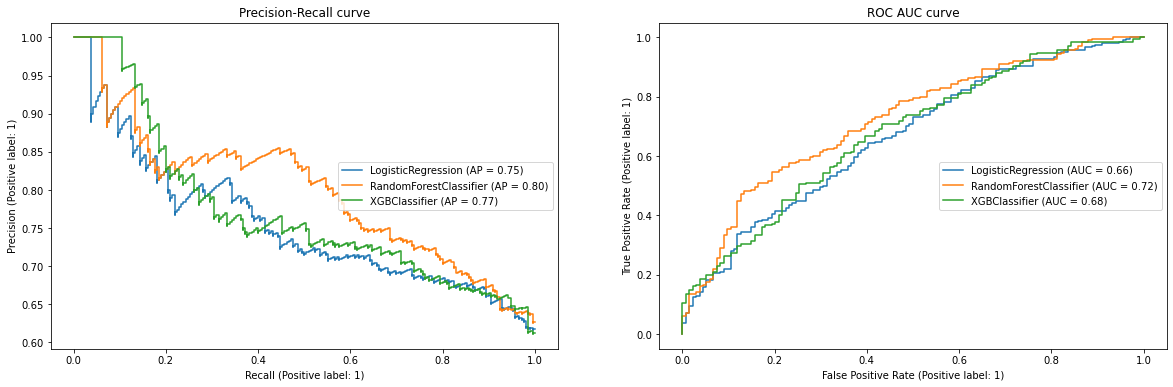

In [59]:
testa_modelos(X_train, y_train, X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

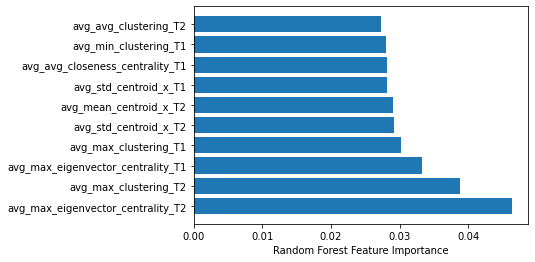

In [61]:
#Feature importance do modelo escolhido
clf = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=8.0, max_features='log2', min_samples_leaf=3,
                        min_samples_split=3, n_estimators=400, n_jobs=-1,
                        random_state=42)
clf.fit(X_train, y_train)
#Feature importance do modelo escolhido
sorted_idx = clf.feature_importances_.argsort()[:-11:-1]
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Por divisão de tempo

100%|██████████| 20/20 [00:32<00:00,  1.60s/trial, best loss: -0.7638900718617961]
Logistic Regression - Best: {'C': 0, 'class_weight': 1, 'max_iter': 400.0, 'penalty': 1, 'solver': 1}
100%|██████████| 20/20 [01:28<00:00,  4.42s/trial, best loss: -0.6733024691358025]
 Random Forest - Best: {'bootstrap': 0, 'class_weight': 0, 'criterion': 1, 'max_depth': 6.0, 'max_features': 2, 'min_samples_leaf': 0, 'min_samples_split': 1, 'n_estimators': 0}
100%|██████████| 20/20 [00:44<00:00,  2.21s/trial, best loss: -0.6520987654320989]
XGBoosting - Best: {'colsample_bytree': 0.65, 'gamma': 0.05, 'learning_rate': 0.04, 'max_depth': 9, 'min_child_weight': 6.0, 'n_estimators': 30, 'scale_pos_weight': 13, 'subsample': 0.8}

LogisticRegression:
CrossVal (mean/std): 64.457% / 2.992%
accuracy: 65.12% | precision: 64.80% | recall: 93.81% | f1: 76.65%

RandomForest:
CrossVal (mean/std): 67.210% / 5.514%
accuracy: 66.86% | precision: 72.64% | recall: 73.33% | f1: 72.99%

XGBClassifier:
CrossVal (mean/std): 6

(LogisticRegression(C=0.001, max_iter=400.0, solver='saga'),
 RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=6.0, max_features='log2', min_samples_split=3,
                        n_estimators=400, n_jobs=-1, random_state=42),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.65, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=0.05, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.04, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=14, max_leaves=None,
               min_child_weight=6.0, missing=nan, monotone_constraints=None,
               n_estimators=350, n_jobs=None, num_parallel_tree=None,
            

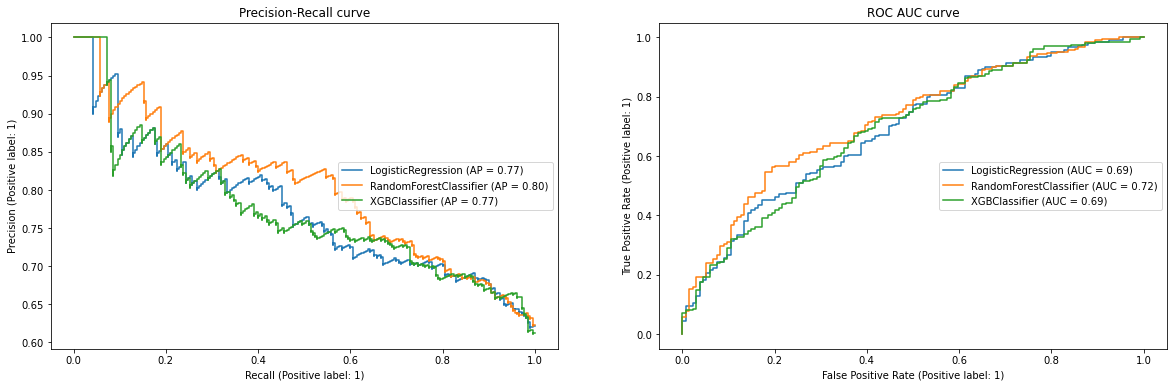

In [111]:
testa_modelos(X_train_t, y_train_t, X_test_t, y_test_t)

Text(0.5, 0, 'Random Forest Feature Importance')

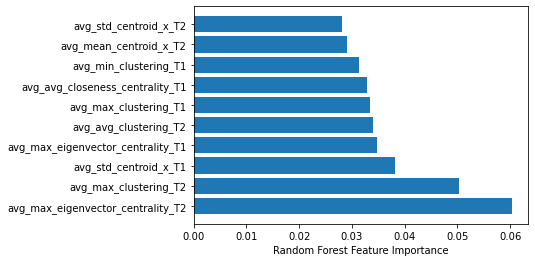

In [106]:
#Feature importance do modelo escolhido
rf = RandomForestClassifier(
        n_estimators=[100, 200, 300, 400,500][4],
        max_depth=14,
        max_features=['auto', 'sqrt', 'log2'][1],
        criterion=["gini", "entropy"][0],
        min_samples_leaf=[1, 2, 3, 4, 5][0],
        min_samples_split=[2, 3, 4, 5, 6][0],
        random_state=42,
        class_weight=['balanced', 'balanced_subsample', None][0],
        bootstrap=[True, False][1],
        n_jobs = -1)
rf.fit(X_train_t, y_train_t)

#Feature importance do modelo escolhido
sorted_idx = clf.feature_importances_.argsort()[:-11:-1]
plt.barh(X_train_t.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

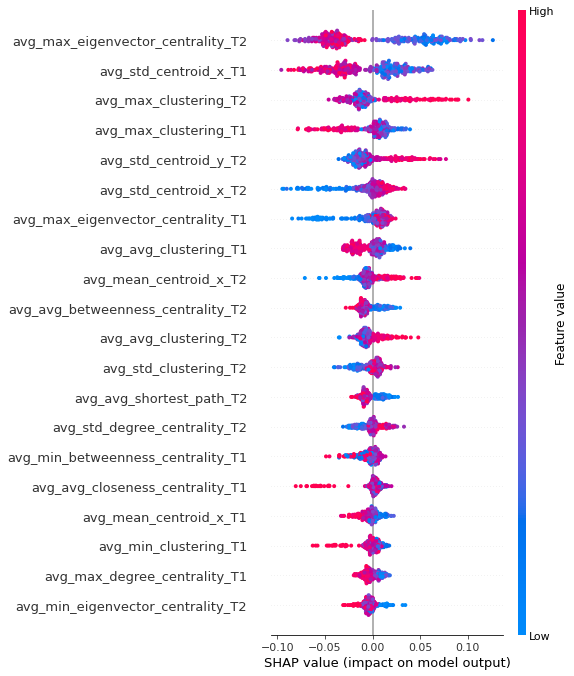

In [110]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_t)

shap.summary_plot(shap_values[0], X_test_t, plot_type='dot')

## Treinar por campeonatos

In [2]:
def split_dataset(df):
    #Separando dados e target
    X = df.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
    y = df['winner'] 
    col_names = X.columns
    idx = df['matchID']

    #Normalizando os dados
    XScaled = StandardScaler().fit_transform(X)

    #Separando treino e teste
    X_train, X_test, y_train, y_test = train_test_split(XScaled,
                                                        y.values,
                                                        stratify= y.values,
                                                        test_size=0.3,
                                                        random_state=42)
    return X_train, X_test, y_train, y_test

In [4]:
def testa_modelos_times(df_ger, df_eng, df_ita, df_fra, df_spa):
    
    cvmean = []
    cvstd = []
    acc = []
    auc = []

    for df in [df_ger, df_eng, df_ita, df_fra, df_spa]:
        
        train_x, test_x, train_y, test_y = split_dataset(df)

        logi = logistic_regression(train_x, train_y)
        rf = random_forest(train_x, train_y)
        xgb = xgboosting(train_x, train_y)

        for clf, name in [(logi, 'LogisticRegression'),
                        (rf, 'RandomForest'),
                        (xgb, 'XGBClassifier')]:
            
            cv = cross_val_score(clf,train_x,train_y, cv = 10 , scoring='accuracy')
            cvmean.append(cv.mean())
            cvstd.append(cv.std())

            clf.fit(train_x, train_y)
            y_pred = clf.predict(test_x)

            acc.append(accuracy_score(test_y, y_pred))
            auc.append(roc_auc_score(test_y, clf.predict_proba(test_x)[:, 1]))

    print('')
    print('GER:')
    print(f"Logistic Regression: Cross validation mean/std: {100*cvmean[0]:.3f}% / {100*cvstd[0]:.3f}% | acc: {100*acc[0]:.3f}% | auc: {100*auc[0]:.3f}%")
    print(f"RandomForest: Cross validation mean/std: {100*cvmean[1]:.3f}% / {100*cvstd[1]:.3f}% | acc: {100*acc[1]:.3f}% | auc: {100*auc[1]:.3f}%")
    print(f"XGBoosting: Cross validation mean/std: {100*cvmean[2]:.3f}% / {100*cvstd[2]:.3f}% | acc: {100*acc[2]:.3f}% | auc: {100*auc[2]:.3f}%")
    print('ENG:')
    print(f"Logistic Regression: Cross validation mean/std: {100*cvmean[3]:.3f}% / {100*cvstd[3]:.3f}% | acc: {100*acc[3]:.3f}% | auc: {100*auc[3]:.3f}%")
    print(f"RandomForest: Cross validation mean/std: {100*cvmean[4]:.3f}% / {100*cvstd[4]:.3f}% | acc: {100*acc[4]:.3f}% | auc: {100*auc[4]:.3f}%")
    print(f"XGBoosting: Cross validation mean/std: {100*cvmean[5]:.3f}% / {100*cvstd[5]:.3f}% | acc: {100*acc[5]:.3f}% | auc: {100*auc[5]:.3f}%")
    print('ITA:')
    print(f"Logistic Regression: Cross validation mean/std: {100*cvmean[6]:.3f}% / {100*cvstd[6]:.3f}% | acc: {100*acc[6]:.3f}% | auc: {100*auc[6]:.3f}%")
    print(f"RandomForest: Cross validation mean/std: {100*cvmean[7]:.3f}% / {100*cvstd[7]:.3f}% | acc: {100*acc[7]:.3f}% | auc: {100*auc[7]:.3f}%")
    print(f"XGBoosting: Cross validation mean/std: {100*cvmean[8]:.3f}% / {100*cvstd[8]:.3f}% | acc: {100*acc[8]:.3f}% | auc: {100*auc[8]:.3f}%")
    print('FRA:')
    print(f"Logistic Regression: Cross validation mean/std: {100*cvmean[9]:.3f}% / {100*cvstd[9]:.3f}% | acc: {100*acc[9]:.3f}% | auc: {100*auc[9]:.3f}%")
    print(f"RandomForest: Cross validation mean/std: {100*cvmean[10]:.3f}% / {100*cvstd[10]:.3f}% | acc: {100*acc[10]:.3f}% | auc: {100*auc[10]:.3f}%")
    print(f"XGBoosting: Cross validation mean/std: {100*cvmean[11]:.3f}% / {100*cvstd[11]:.3f}% | acc: {100*acc[11]:.3f}% | auc: {100*auc[11]:.3f}%")
    print('SPA:')
    print(f"Logistic Regression: Cross validation mean/std: {100*cvmean[12]:.3f}% / {100*cvstd[12]:.3f}% | acc: {100*acc[12]:.3f}% | auc: {100*auc[12]:.3f}%")
    print(f"RandomForest: Cross validation mean/std: {100*cvmean[13]:.3f}% / {100*cvstd[13]:.3f}% | acc: {100*acc[13]:.3f}% | auc: {100*auc[13]:.3f}%")
    print(f"XGBoosting: Cross validation mean/std: {100*cvmean[14]:.3f}% / {100*cvstd[14]:.3f}% | acc: {100*acc[14]:.3f}% | auc: {100*auc[14]:.3f}%")


In [20]:
testa_modelos_times(avg_ger, avg_eng, avg_ita, avg_fra, avg_spa)

100%|██████████| 20/20 [00:36<00:00,  1.80s/trial, best loss: -0.7581954887218045]
Logistic Regression - Best: {'C': 1, 'class_weight': 1, 'max_iter': 600.0, 'penalty': 0, 'solver': 1}
100%|██████████| 20/20 [00:57<00:00,  2.90s/trial, best loss: -0.6974358974358974]
 Random Forest - Best: {'bootstrap': 0, 'class_weight': 0, 'criterion': 0, 'max_depth': 14.0, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 0}
100%|██████████| 20/20 [00:11<00:00,  1.71trial/s, best loss: -0.7]               
XGBoosting - Best: {'colsample_bytree': 0.25, 'gamma': 0.22, 'learning_rate': 0.42, 'max_depth': 6, 'min_child_weight': 5.0, 'n_estimators': 31, 'scale_pos_weight': 2, 'subsample': 0.75}
100%|██████████| 20/20 [00:11<00:00,  1.79trial/s, best loss: -0.8017378917378917]
Logistic Regression - Best: {'C': 2, 'class_weight': 1, 'max_iter': 500.0, 'penalty': 0, 'solver': 1}
100%|██████████| 20/20 [00:53<00:00,  2.67s/trial, best loss: -0.7025735294117647]
 Random Forest 

# Clustering

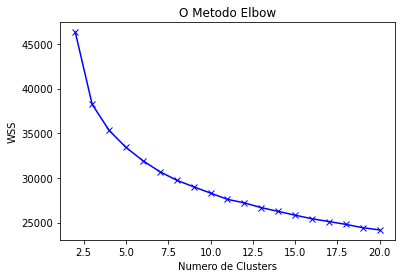

In [76]:
# Clustering

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
# y_pca = X['winner']
# x_pca = X.drop(['winner'], axis=1)
X_sc = StandardScaler().fit_transform(X)
wcss = calculate_wcss(X_sc)
plt.figure(figsize=(6,4))
plt.plot(range(2, 21), wcss, 'bx-')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [77]:
best_n_cluster = optimal_number_of_clusters(wcss)
best_n_cluster

6

For n_clusters = 2 The average silhouette_score is : 0.17207502125822977
For n_clusters = 3 The average silhouette_score is : 0.17365552532672124
For n_clusters = 4 The average silhouette_score is : 0.1437005109283496
For n_clusters = 5 The average silhouette_score is : 0.12318898683909954
For n_clusters = 6 The average silhouette_score is : 0.11171366528824403
For n_clusters = 7 The average silhouette_score is : 0.10860835506135517


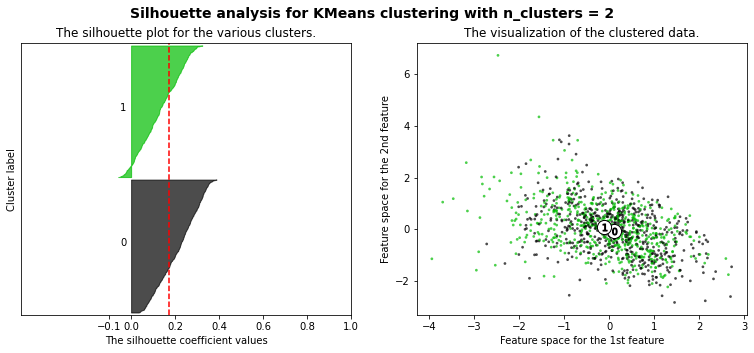

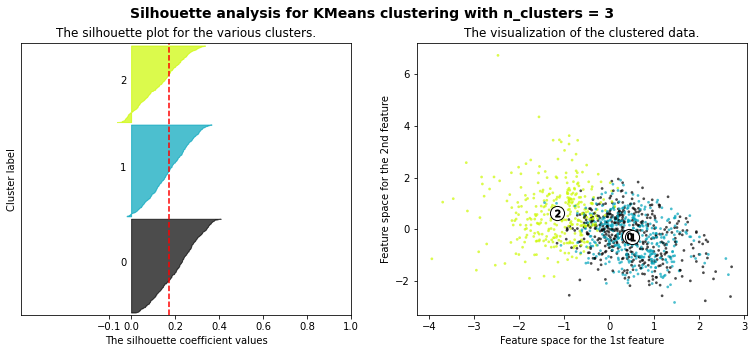

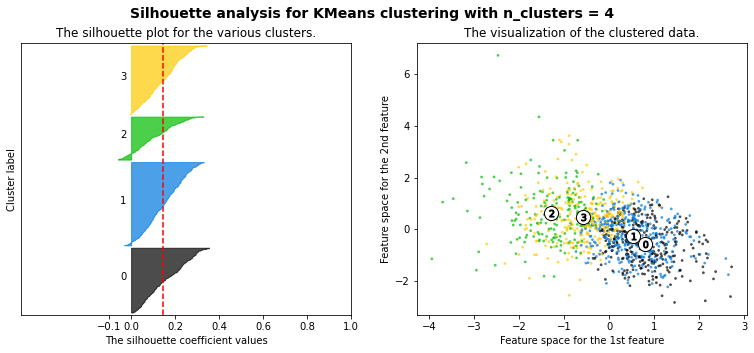

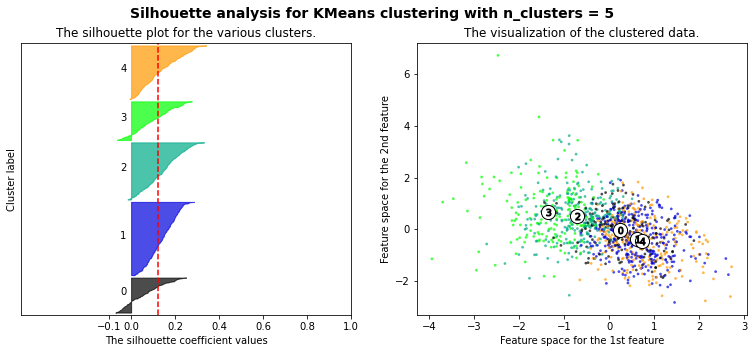

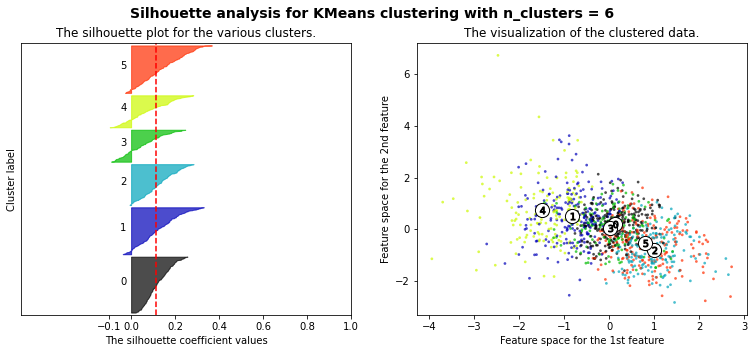

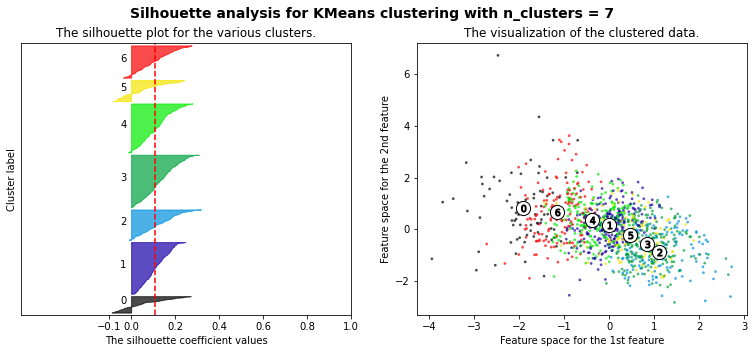

In [78]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

sc_df = pd.DataFrame(data = X_sc, columns=col_names)

# pca_df.drop(['tournament'], axis=1, inplace=True)

for n_clusters in range(2, 8):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13, 5)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.5, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, 
    # to demarcate them clearly.
    ax1.set_ylim([0, len(sc_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(sc_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(sc_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(sc_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(sc_df.iloc[:, 0], sc_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

plt.show()

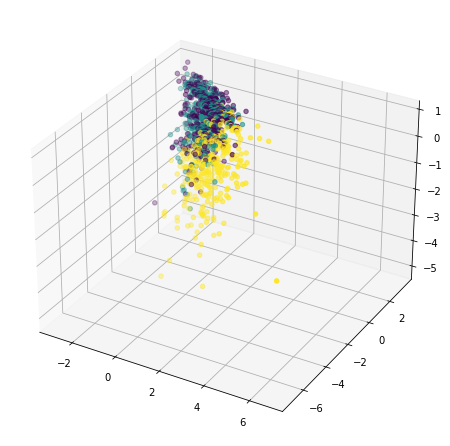

In [80]:
df_merge_col_values = pd.DataFrame(sc_df).values

kmeans = KMeans(n_clusters = 3, n_jobs = -1, max_iter= 400)
kmeans = kmeans.fit(sc_df)
k_means_predicted = kmeans.predict(sc_df)

# Getting the cluster centers
C = kmeans.cluster_centers_
# Getting the distance
distance = kmeans.fit_transform(sc_df)
# Getting the labels
labels = kmeans.labels_
# Plotando
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)
ax.scatter(df_merge_col_values[:, 1], df_merge_col_values[:, 2], df_merge_col_values[:,3], c=k_means_predicted)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='', s=1000)
plt.show()

In [84]:
# Marcar a previsão = 1
k_means_predicted = pd.DataFrame(k_means_predicted)
# Inserir na base full
X_kmeans = sc_df.copy()
X_kmeans['cluster'] = k_means_predicted
X_kmeans['tournament'] = avg_df['tournament']

In [90]:
X_kmeans.groupby(['cluster', 'tournament'])['cluster'].count()

cluster  tournament           
0        England                   63
         European_Championship      1
         France                    70
         Germany                  117
         Italy                     87
         Spain                     70
         World_Cup                  2
1        England                   81
         France                    81
         Germany                   46
         Italy                     93
         Spain                     99
         World_Cup                  1
2        England                   87
         European_Championship      1
         France                    80
         Germany                   18
         Italy                     70
         Spain                     76
         World_Cup                  3
Name: cluster, dtype: int64

In [89]:
X_kmeans.groupby(['tournament', 'cluster'])['tournament'].count()

tournament             cluster
England                0           63
                       1           81
                       2           87
European_Championship  0            1
                       2            1
France                 0           70
                       1           81
                       2           80
Germany                0          117
                       1           46
                       2           18
Italy                  0           87
                       1           93
                       2           70
Spain                  0           70
                       1           99
                       2           76
World_Cup              0            2
                       1            1
                       2            3
Name: tournament, dtype: int64

# PCA

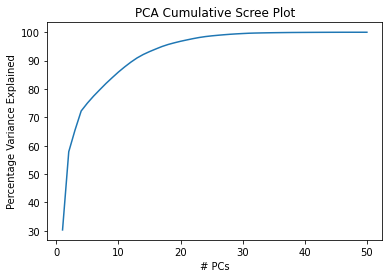

In [91]:
# PCA

pca = PCA()
pca.fit(X_sc)
X_pca = pca.fit_transform(X_sc)

y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,len(pca.explained_variance_)+1)
plt.plot(x,y)
plt.ylabel('Percentage Variance Explained')
plt.xlabel('# PCs')
plt.title('PCA Cumulative Scree Plot')
plt.show()

In [92]:
np.cumsum(pca.explained_variance_ratio_)


array([0.30331161, 0.57888563, 0.65456922, 0.72253179, 0.75024171,
       0.77497398, 0.79752136, 0.81959788, 0.83997624, 0.85978817,
       0.87786678, 0.89463225, 0.90950461, 0.92165125, 0.93174413,
       0.94084764, 0.94961254, 0.95686096, 0.96275826, 0.96812964,
       0.97287498, 0.97741284, 0.98146569, 0.98472677, 0.98722961,
       0.98930718, 0.99120568, 0.99287442, 0.99428663, 0.99545069,
       0.99650405, 0.99716229, 0.99762315, 0.9980413 , 0.99838144,
       0.99865977, 0.99892226, 0.99913433, 0.99927891, 0.99941235,
       0.99953605, 0.99964672, 0.99974204, 0.99982599, 0.99989558,
       0.99995117, 0.99996731, 0.99998144, 0.99999127, 1.        ])

In [93]:
#Escolho o número de componentes baseado na variância acumalada desejada
cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.9) + 1
d

13

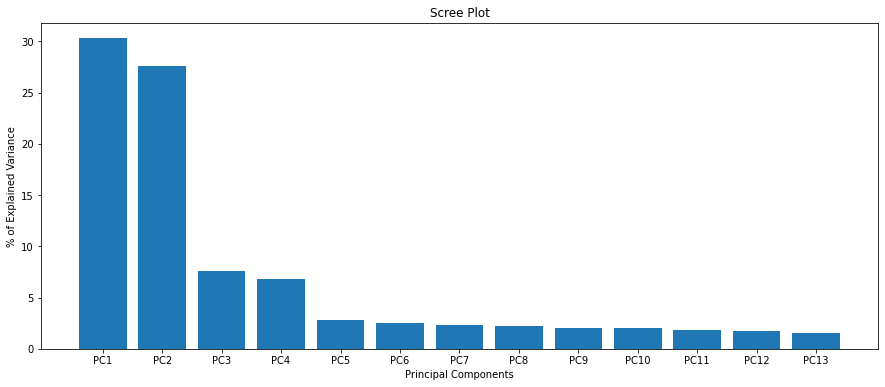

In [94]:
pca = PCA(n_components=d)
pca.fit(X_sc)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

X_pca = pca.fit_transform(X_sc)
pca_df = pd.DataFrame(data = X_pca, columns=labels)
pca_df['tournament'] = avg_df['tournament']

plt.figure(figsize = (15, 6))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('% of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [357]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,tournament
0,3.785862,1.149640,-5.985203,-1.341283,-2.397999,0.412227,-1.083490,-0.839873,-0.010335,0.997831,-1.375736,-0.471690,-1.050114,-2.086788,-0.659759,-0.460011,0.353937,0.474661,1.090967,-2.645360,-0.440287,0.501893,1.126652,1.138166,-0.930316,Germany
1,3.322232,-1.634187,-4.365087,-1.018069,0.041882,0.306778,-0.818221,-0.256655,-0.719045,1.698041,-1.041239,-1.004682,-0.700036,-2.529393,-0.913828,1.028902,1.053988,1.113523,0.298418,0.289729,-1.224945,-0.442301,1.038123,1.570476,-0.478088,Germany
2,3.349082,2.625497,-3.381368,0.464358,-1.515731,-0.638633,-2.271617,-1.266224,2.201355,2.031771,-0.742959,-1.387203,-1.522260,-0.680207,0.515829,0.148492,1.448706,-0.606910,-0.845586,-0.181403,-0.619111,-1.143692,-0.160415,1.036755,-0.496647,Germany
3,2.142554,5.990377,-0.906129,2.171882,0.939859,1.343896,-1.207311,-0.793826,-0.911198,0.707865,0.112831,-1.296625,-0.082570,-1.369808,0.039354,-0.237211,-0.780851,-0.594211,0.758296,1.282912,-1.338384,-1.922125,1.367984,0.432396,0.519155,Germany
4,2.760276,-0.338869,-2.688133,-3.249346,3.545799,1.859677,-2.776665,-0.617371,-0.821954,1.592703,3.548630,-2.045436,-0.719354,-0.691609,-0.402724,1.674285,0.065664,-0.201249,-0.695880,-0.331601,-0.889887,-0.353435,0.614210,0.441580,-0.617556,Germany


avg_avg_degree_centrality_T1        -0.203309
avg_avg_betweenness_centrality_T1    0.202996
avg_avg_shortest_path_T1             0.201676
avg_avg_closeness_centrality_T1     -0.200706
avg_max_betweenness_centrality_T1    0.198702
avg_min_clustering_T1               -0.196615
avg_std_betweenness_centrality_T1    0.196004
avg_std_eigenvector_centrality_T1    0.192903
avg_avg_clustering_T1               -0.189012
avg_avg_eigenvector_centrality_T1   -0.186358
dtype: float64


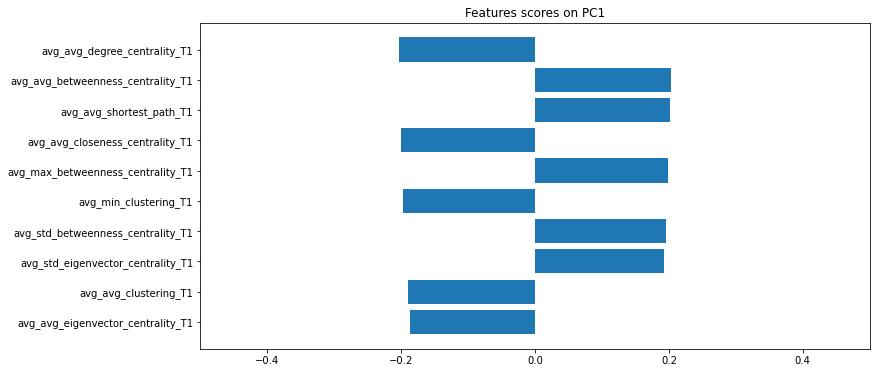

In [95]:
## get the name of the top 10 measurements that contribute most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=X_t.columns)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 features
top_10_features = sorted_loading_scores[:10].index.values
 
print(loading_scores[top_10_features])

plt.figure(figsize = (12, 6))
plt.xlim([-0.5, 0.5])
plt.barh(top_10_features[::-1], loading_scores[top_10_features][::-1])
plt.title('Features scores on PC1')
plt.show()

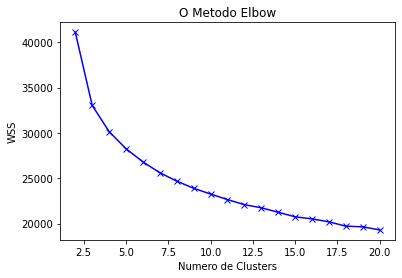

In [96]:
# Clustering

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
# y_pca = X['winner']
# x_pca = X.drop(['winner'], axis=1)
wcss = calculate_wcss(X_pca)
plt.figure(figsize=(6,4))
plt.plot(range(2, 21), wcss, 'bx-')
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [97]:
best_n_cluster = optimal_number_of_clusters(wcss)
best_n_cluster

6

For n_clusters = 2 The average silhouette_score is : 0.18904836258570717
For n_clusters = 3 The average silhouette_score is : 0.19378866585063476
For n_clusters = 4 The average silhouette_score is : 0.1626623041879148
For n_clusters = 5 The average silhouette_score is : 0.1410946555557032
For n_clusters = 6 The average silhouette_score is : 0.12904347189780047
For n_clusters = 7 The average silhouette_score is : 0.12172732434162645


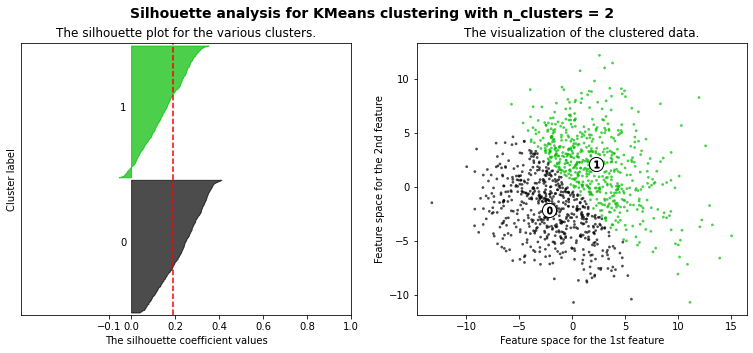

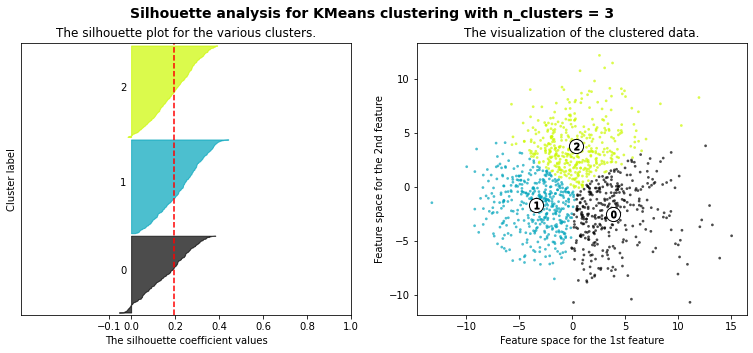

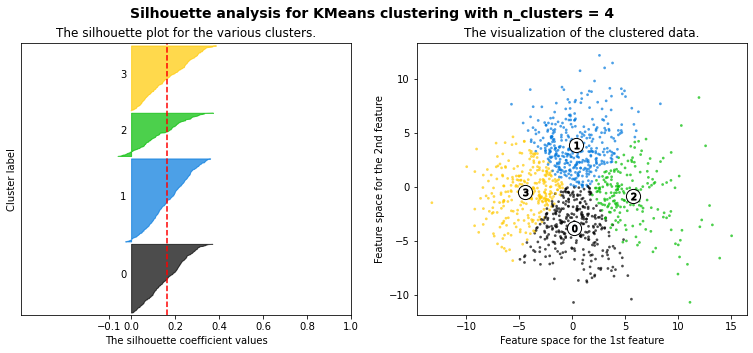

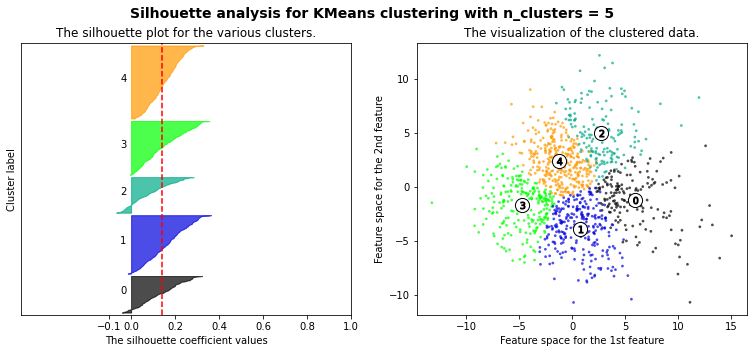

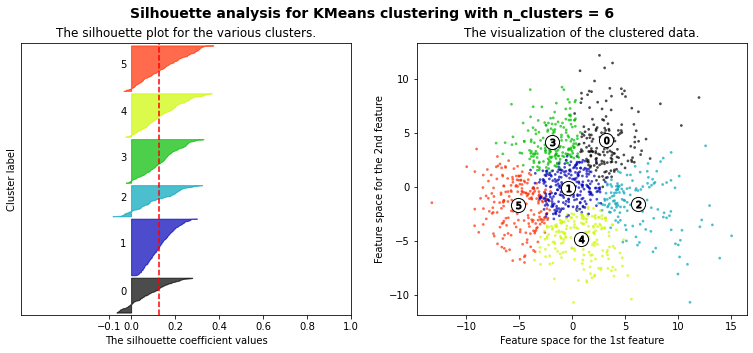

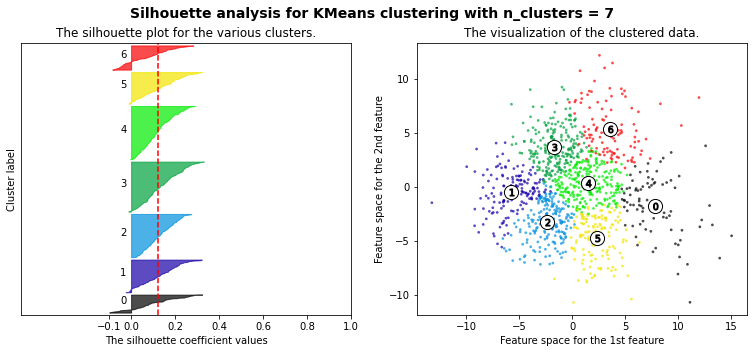

In [98]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

sc_df = pd.DataFrame(data = X_sc, columns=col_names)

pca_df.drop(['tournament'], axis=1, inplace=True)

for n_clusters in range(2, 8):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(13, 5)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.5, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, 
    # to demarcate them clearly.
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

plt.show()

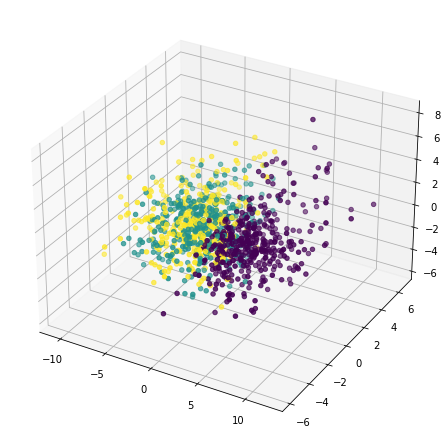

In [99]:
df_merge_col_values = pd.DataFrame(pca_df).values

kmeans = KMeans(n_clusters = 3, n_jobs = -1, max_iter= 400)
kmeans = kmeans.fit(pca_df)
k_means_predicted = kmeans.predict(pca_df)

# Getting the cluster centers
C = kmeans.cluster_centers_
# Getting the distance
distance = kmeans.fit_transform(pca_df)
# Getting the labels
labels = kmeans.labels_
# Plotando
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)
ax.scatter(df_merge_col_values[:, 1], df_merge_col_values[:, 2], df_merge_col_values[:,3], c=k_means_predicted)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='', s=1000)
plt.show()

In [100]:
# Marcar a previsão = 1
k_means_predicted = pd.DataFrame(k_means_predicted)
# Inserir na base full
X_kmeans = pca_df.copy()
X_kmeans['cluster'] = k_means_predicted
X_kmeans['tournament'] = avg_df['tournament']

In [101]:
X_kmeans.groupby(['cluster', 'tournament'])['cluster'].count()

cluster  tournament           
0        England                   81
         France                    81
         Germany                   46
         Italy                     93
         Spain                     99
         World_Cup                  1
1        England                   63
         European_Championship      1
         France                    70
         Germany                  117
         Italy                     88
         Spain                     70
         World_Cup                  2
2        England                   87
         European_Championship      1
         France                    80
         Germany                   18
         Italy                     69
         Spain                     76
         World_Cup                  3
Name: cluster, dtype: int64

In [102]:
X_kmeans.groupby(['tournament', 'cluster'])['tournament'].count()

tournament             cluster
England                0           81
                       1           63
                       2           87
European_Championship  1            1
                       2            1
France                 0           81
                       1           70
                       2           80
Germany                0           46
                       1          117
                       2           18
Italy                  0           93
                       1           88
                       2           69
Spain                  0           99
                       1           70
                       2           76
World_Cup              0            1
                       1            2
                       2            3
Name: tournament, dtype: int64